# 데이터정제연습

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline

In [2]:
df = pd.read_csv("FITNESS_결측.csv", engine='python', encoding='CP949')
df

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


In [3]:
df.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [4]:
df.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [5]:
df['GENDER'].fillna('여성', inplace = True)
df

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


In [6]:
df.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000000,29.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,46.838710,77.178276,47.375806,10.586129,169.645161,56.677419,173.774194
std,5.860016,8.554578,5.327231,1.387414,10.251986,17.822060,9.164095
min,37.000000,59.080000,37.388000,8.170000,146.000000,40.000000,155.000000
25%,43.000000,73.030000,44.964500,9.780000,163.000000,48.000000,168.000000
50%,48.000000,76.320000,46.774000,10.470000,170.000000,53.000000,172.000000
75%,51.000000,82.780000,50.131000,11.270000,176.000000,60.500000,180.000000
max,57.000000,91.630000,60.055000,14.030000,186.000000,144.000000,192.000000


In [7]:
# df.groupby('GENDER')['WEIGHT'].agg('mean')
df['WEIGHT'] = df['WEIGHT'].fillna(df.groupby('GENDER')['WEIGHT'].transform('mean').round(3))
df

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [8]:
df.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,46.838710,77.517290,47.375806,10.586129,169.645161,56.677419,173.774194
std,5.860016,8.368042,5.327231,1.387414,10.251986,17.822060,9.164095
min,37.000000,59.080000,37.388000,8.170000,146.000000,40.000000,155.000000
25%,43.000000,73.200000,44.964500,9.780000,163.000000,48.000000,168.000000
50%,48.000000,77.450000,46.774000,10.470000,170.000000,53.000000,172.000000
75%,51.000000,82.606500,50.131000,11.270000,176.000000,60.500000,180.000000
max,57.000000,91.630000,60.055000,14.030000,186.000000,144.000000,192.000000


In [9]:
df1 = pd.read_csv("FITNESS_결측.csv", engine='python', encoding = 'CP949')
df1.fillna(method = "pad")

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,70.87,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


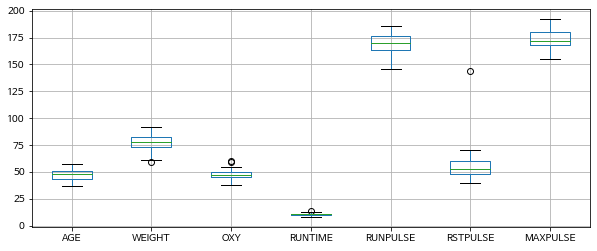

In [10]:
df.boxplot(figsize=(10,4))

In [11]:
df[df['RSTPULSE']>100]
# df.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


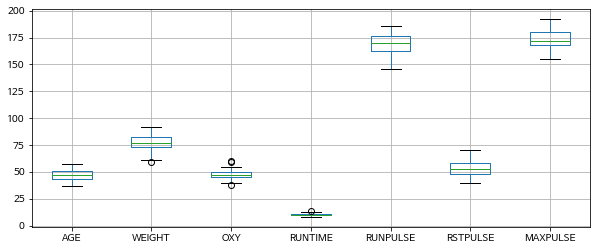

In [12]:
new = df[df['RSTPULSE']<100]
new.boxplot(figsize = (10,4))

In [13]:
new

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [14]:
new.reset_index(drop=True, inplace=True)
new

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [15]:
df2 = pd.read_csv("FITNESS_결측.csv", engine='python', encoding = 'CP949')
df2.fillna(method = "pad")

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,70.87,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


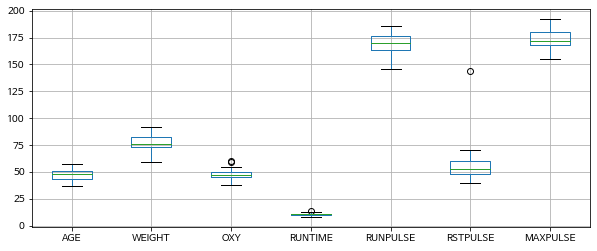

In [16]:
df2.boxplot(figsize=(10,4))


In [23]:
df2.loc[df2['RSTPULSE']>100,'RSTPULSE'] = np.nan
df2['RSTPULSE'] = df2['RSTPULSE'].fillna(df2.groupby('GENDER')['RSTPULSE'].transform('mean').round(0))
df2.fillna(method='ffill', inplace=True)


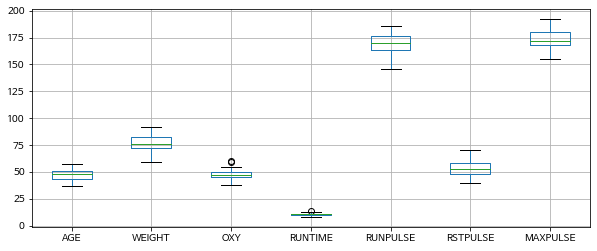

In [24]:
df2.boxplot(figsize = (10,4))


In [25]:
df_num = df2.select_dtypes(exclude="object")
df_num

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.15,59.571,8.17,166,40.0,172
1,38,81.87,60.055,8.63,170,48.0,186
2,43,85.84,54.297,8.65,156,45.0,168
3,50,70.87,54.625,8.92,146,48.0,155
4,49,70.87,49.156,8.95,180,44.0,185
5,38,89.02,49.874,9.22,178,55.0,180
6,49,76.32,48.673,9.40,186,56.0,188
7,52,76.32,45.441,9.63,164,48.0,166
8,57,59.08,50.545,9.93,148,49.0,155
9,51,77.91,46.672,10.00,162,48.0,168


In [26]:
df_char = df2.select_dtypes(include = "object")
df_char

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대
5,Allen,남성,30대
6,Nancy,여성,40대
7,Patty,여성,50대
8,Suzanne,여성,50대
9,Teresa,여성,50대


In [27]:
df_scale = scale(df_num)
df_scale = pd.DataFrame(df_scale, columns=df_num.columns)
df_scale

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.839365,-1.081954,2.327059,-1.770249,-0.361434,-1.895837,-0.196803
1,-1.533241,0.588136,2.419415,-1.433216,0.035184,-0.802424,1.356151
2,-0.665896,1.071391,1.320686,-1.418562,-1.352978,-1.212454,-0.640504
3,0.548385,-0.750857,1.383275,-1.220739,-2.344523,-0.802424,-2.082533
4,0.374916,-0.750857,0.339692,-1.198758,1.026728,-1.349131,1.245226
5,-1.533241,1.458482,0.476700,-1.000935,0.828419,0.154312,0.690599
6,0.374916,-0.087447,0.247528,-0.869053,1.621655,0.290989,1.578002
7,0.895323,-0.087447,-0.369195,-0.700536,-0.559743,-0.802424,-0.862355
8,1.762667,-2.186014,0.604738,-0.480732,-2.146214,-0.665748,-2.082533
9,0.721854,0.106099,-0.134299,-0.429445,-0.758052,-0.802424,-0.640504


In [32]:
df_desc = df_scale.describe()
df_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.707,-2.186,-1.906,-1.770,-2.345,-1.896,-2.083
25%,-0.666,-0.619,-0.460,-0.591,-0.659,-0.802,-0.641
50%,0.201,-0.087,-0.115,-0.085,0.035,-0.119,-0.197
75%,0.722,0.644,0.526,0.501,0.630,0.633,0.691
max,1.763,1.776,2.419,2.523,1.622,2.204,2.022


In [34]:
df_scale_minmax = minmax_scale(df_num)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns=df_num.columns)
df_min_desc = df_scale_minmax.describe()
df_min_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,0.492,0.552,0.441,0.412,0.591,0.462,0.507
std,0.293,0.257,0.235,0.237,0.256,0.248,0.248
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.395,0.334,0.275,0.425,0.267,0.351
50%,0.550,0.530,0.414,0.392,0.600,0.433,0.459
75%,0.700,0.714,0.562,0.529,0.750,0.617,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [36]:
df_robust = robust_scale(df_num)
df_robust = pd.DataFrame(df_robust, columns=df_num.columns)
df_robust_desc = df_robust.describe()
df_robust_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,-0.145,0.069,0.116,0.078,-0.027,0.083,0.148
std,0.733,0.805,1.031,0.931,0.789,0.708,0.764
min,-1.375,-1.662,-1.817,-1.544,-1.846,-1.238,-1.417
25%,-0.625,-0.421,-0.350,-0.463,-0.538,-0.476,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.375,0.579,0.650,0.537,0.462,0.524,0.667
max,1.125,1.476,2.571,2.389,1.231,1.619,1.667


In [38]:
df_rstpulse = pd.DataFrame()
df_rstpulse['RAW'] = df_num['RSTPULSE']
df_rstpulse['STANDARD'] = df_scale['RSTPULSE']
df_rstpulse['MinMax'] = df_scale_minmax['RSTPULSE']
df_rstpulse['Robust'] = df_robust['RSTPULSE']
df_rstpulse.head().round(3)


,RAW,STANDARD,MinMax,Robust
0,40.0,-1.896,0.000,-1.238
1,48.0,-0.802,0.267,-0.476
2,45.0,-1.212,0.167,-0.762
3,48.0,-0.802,0.267,-0.476
4,44.0,-1.349,0.133,-0.857


In [39]:
df_rstpulse.describe().round(3)

,RAW,STANDARD,MinMax,Robust
count,31.000,31.000,31.000,31.000
mean,53.871,0.000,0.462,0.083
std,7.437,1.017,0.248,0.708
min,40.000,-1.896,0.000,-1.238
25%,48.000,-0.802,0.267,-0.476
50%,53.000,-0.119,0.433,0.000
75%,58.500,0.633,0.617,0.524
max,70.000,2.204,1.000,1.619


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f507c91cc50>,
      dtype=object)

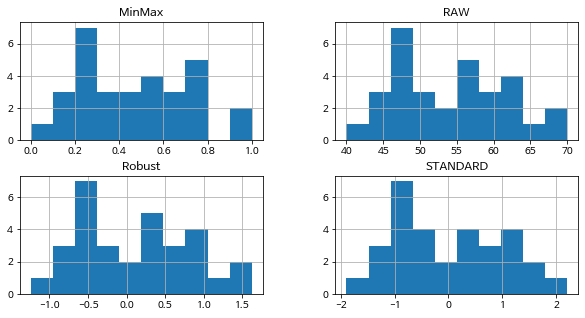

In [40]:
df_rstpulse[['RAW', 'STANDARD','MinMax','Robust']].hist(figsize=(10,5))